In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TRAIN_DATASET_PATH = 'F:/Geoscience_data/AIcrowd_2020/data_train.npz'
TRAIN_LABELS_PATH  = 'F:/Geoscience_data/AIcrowd_2020/labels_train.npz'
TEST_DATASET_PATH  = 'F:/Geoscience_data/AIcrowd_2020/data_test_1.npz'

FEATURE_VOL_PATH = 'D:/temp/attribute_volumes/'
OUTPUT_FILE_PATH = 'D:/temp/attribute_volumes/'

In [3]:
# Load train dataset
train_dataset = np.load(TRAIN_DATASET_PATH, allow_pickle=True, mmap_mode='r')
train_dataset = train_dataset["data"]

In [4]:
nz, nx, ny = train_dataset.shape
nz, nx, ny

(1006, 782, 590)

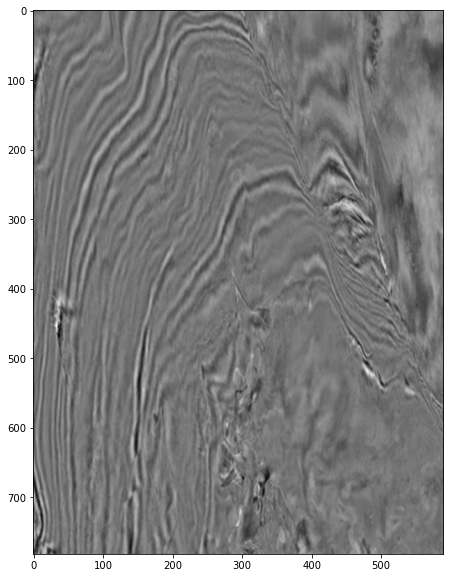

In [5]:
# Test cell: view seismic slice

# Setting figure size
plt.rcParams["figure.figsize"] = (20, 10)
# We plot the slice
plt.imshow(train_dataset[400,:,:], cmap='binary')

In [6]:
# sampling interval along y-dimension
dy = 100

train_data = np.load(TRAIN_DATASET_PATH)['data'][:,:,::dy]
label_data = np.load(TRAIN_LABELS_PATH)['labels'][:,:,::dy]

### Skip this next section, as we already wrote out the training set with features in CSV format

In [ ]:
out_df = pd.DataFrame(train_data.reshape(-1), columns=['seis_amplitude'])

In [ ]:
# Load specific slices of data for training: (taking every 59th nz*nx slice)
feat_seis_amp_norm  = np.load(FEATURE_VOL_PATH+'seis_ampl_standardized.npz')['data'][:,:,::dy]
feat_seis_cos_phase = np.load(FEATURE_VOL_PATH+'seis_cos_instantaneous_phase.npz')['data'][:,:,::dy]
feat_seis_envelope  = np.load(FEATURE_VOL_PATH+'seis_envelope.npz')['data'][:,:,::dy]
feat_seis_hilbert   = np.load(FEATURE_VOL_PATH+'seis_hilbert.npz')['data'][:,:,::dy]
feat_seis_maxpkamp  = np.load(FEATURE_VOL_PATH+'seis_maxpeakamp.npz')['data'][:,:,::dy]
feat_seis_rms  = np.load(FEATURE_VOL_PATH+'seis_rms.npz')['data'][:,:,::dy]
feat_seis_Xpos = np.load(FEATURE_VOL_PATH+'seis_Xpos.npz')['data'][:,:,::dy]
feat_seis_Ypos = np.load(FEATURE_VOL_PATH+'seis_Ypos.npz')['data'][:,:,::dy]
feat_seis_Zpos = np.load(FEATURE_VOL_PATH+'seis_Zpos.npz')['data'][:,:,::dy]

In [ ]:
out_df['seis_ampl_norm']  = feat_seis_amp_norm.reshape(-1)
out_df['seis_cos_phase']  = feat_seis_cos_phase.reshape(-1)
out_df['seis_envelope']   = feat_seis_envelope.reshape(-1)
out_df['seis_hilbert']    = feat_seis_hilbert.reshape(-1)
out_df['seis_maxpeakamp'] = feat_seis_maxpkamp.reshape(-1)
out_df['seis_rms']  = feat_seis_rms.reshape(-1)
out_df['seis_Xpos'] = feat_seis_Xpos.reshape(-1)
out_df['seis_Ypos'] = feat_seis_Ypos.reshape(-1)
out_df['seis_Zpos'] = feat_seis_Zpos.reshape(-1)

In [ ]:
del feat_seis_amp_norm, feat_seis_cos_phase, feat_seis_envelope, feat_seis_hilbert, feat_seis_maxpkamp, feat_seis_rms, feat_seis_Xpos, feat_seis_Ypos, feat_seis_Zpos 

In [ ]:
feat_glcm_asm = np.load(FEATURE_VOL_PATH+'glcm_asm.npz')['data'][:,:,::dy]
feat_glcm_contrast = np.load(FEATURE_VOL_PATH+'glcm_contrast.npz')['data'][:,:,::dy]
feat_glcm_entropy  = np.load(FEATURE_VOL_PATH+'glcm_entropy.npz')['data'][:,:,::dy]
feat_glcm_maxamp   = np.load(FEATURE_VOL_PATH+'glcm_maxamp.npz')['data'][:,:,::dy]
feat_glcm_mean     = np.load(FEATURE_VOL_PATH+'glcm_mean.npz')['data'][:,:,::dy]
feat_glcm_stdev    = np.load(FEATURE_VOL_PATH+'glcm_stdev.npz')['data'][:,:,::dy]
feat_glcm_dissimilarity = np.load(FEATURE_VOL_PATH+'glcm_dissimilarity.npz')['data'][:,:,::dy]
feat_glcm_homogeneity   = np.load(FEATURE_VOL_PATH+'glcm_homogeneity.npz')['data'][:,:,::dy]
feat_glcm_totalenergy   = np.load(FEATURE_VOL_PATH+'glcm_totalenergy.npz')['data'][:,:,::dy]

In [ ]:
out_df['glcm_asm']       = feat_glcm_asm.reshape(-1)
out_df['glcm_contrast']  = feat_glcm_contrast.reshape(-1)
out_df['glcm_entropy']   = feat_glcm_entropy.reshape(-1)
out_df['glcm_maxamp']    = feat_glcm_maxamp.reshape(-1)
out_df['glcm_mean']      = feat_glcm_mean.reshape(-1)
out_df['glcm_stdev']     = feat_glcm_stdev.reshape(-1)
out_df['glcm_dissimilarity'] = feat_glcm_dissimilarity.reshape(-1)
out_df['glcm_homogeneity']   = feat_glcm_homogeneity.reshape(-1)
out_df['glcm_totalenergy']   = feat_glcm_totalenergy.reshape(-1)

In [ ]:
del feat_glcm_asm, feat_glcm_contrast, feat_glcm_entropy, feat_glcm_maxamp, feat_glcm_mean, feat_glcm_stdev, feat_glcm_dissimilarity, feat_glcm_homogeneity, feat_glcm_totalenergy

In [ ]:
feat_fband_02_04  = np.load(FEATURE_VOL_PATH+'fdecomp_02_04hz.npz')['data'][:,:,::dy]
feat_fband_04_08  = np.load(FEATURE_VOL_PATH+'fdecomp_04_08hz.npz')['data'][:,:,::dy]
feat_fband_08_16  = np.load(FEATURE_VOL_PATH+'fdecomp_08_16hz.npz')['data'][:,:,::dy]
feat_fband_16_32  = np.load(FEATURE_VOL_PATH+'fdecomp_16_32hz.npz')['data'][:,:,::dy]
feat_fband_32_64  = np.load(FEATURE_VOL_PATH+'fdecomp_32_64hz.npz')['data'][:,:,::dy]
feat_fband_64_128 = np.load(FEATURE_VOL_PATH+'fdecomp_64_128hz.npz')['data'][:,:,::dy]

In [ ]:
out_df['02_04hz']  = feat_fband_02_04.reshape(-1)
out_df['04_08hz']  = feat_fband_04_08.reshape(-1)
out_df['08_16hz']  = feat_fband_08_16.reshape(-1)
out_df['16_32hz']  = feat_fband_16_32.reshape(-1)
out_df['32_64hz']  = feat_fband_32_64.reshape(-1)
out_df['64_128hz'] = feat_fband_64_128.reshape(-1)

In [ ]:
out_df.columns

In [ ]:
# write out to file for future use:
#out_df.to_csv('my_seismic_features.csv')

### Back in the game

In [7]:
out_df = pd.read_csv('my_seismic_features.csv')

In [8]:
out_df['facies'] = label_data.reshape(-1)

In [9]:
# Quick view of the statistical distribution of the input variables
out_df.describe()

,Unnamed: 0,seis_amplitude,seis_ampl_norm,seis_cos_phase,seis_envelope,seis_hilbert,seis_maxpeakamp,seis_rms,seis_Xpos,seis_Ypos,...,glcm_dissimilarity,glcm_homogeneity,glcm_totalenergy,02_04hz,04_08hz,08_16hz,16_32hz,32_64hz,64_128hz,facies
count,4.720152e+06,4.720152e+06,4.720152e+06,4720152.0,4.720152e+06,4.720152e+06,4.720152e+06,4.720152e+06,4.720152e+06,4.720152e+06,...,4.720152e+06,4.720152e+06,4.720152e+06,4.720152e+06,4.720152e+06,4.720152e+06,4.720152e+06,4.720152e+06,4.720152e+06,4.720152e+06
mean,2.360076e+06,7.453974e-01,1.557884e-10,0.0,4.302178e+02,-9.801682e-15,4.083730e+02,6.358005e+02,3.915000e+02,2.510000e+02,...,1.795513e+00,2.410242e+01,1.881621e+01,1.375581e-01,4.995110e-01,1.247293e-01,1.189416e-01,-5.123762e-02,3.749198e-03,2.851084e+00
std,1.362591e+06,3.925401e+02,1.000000e+00,0.0,3.508390e+02,3.925393e+02,3.435350e+02,6.334815e+02,2.257438e+02,1.707825e+02,...,1.837828e+00,9.172005e-01,3.515655e+00,3.401157e+01,8.996718e+01,3.177869e+02,7.470462e+02,5.508188e+02,4.935376e+01,1.458344e+00
min,0.000000e+00,-4.353441e+03,-1.115062e+01,0.0,1.190697e-01,-4.068163e+03,-1.057320e+03,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,1.020000e+01,5.744563e+00,-4.266550e+02,-1.345835e+03,-5.430746e+03,-1.008564e+04,-6.141089e+03,-5.624444e+02,1.000000e+00
25%,1.180038e+06,-1.872125e+02,-4.924805e-01,0.0,1.874229e+02,-1.894313e+02,1.727229e+02,2.028754e+02,1.960000e+02,1.010000e+02,...,0.000000e+00,2.350000e+01,1.652271e+01,-1.573553e+01,-4.937138e+01,-1.699226e+02,-3.650674e+02,-2.560069e+02,-1.895726e+01,2.000000e+00
50%,2.360076e+06,1.382492e+00,1.728954e-03,0.0,3.336095e+02,-1.463589e+00,3.203745e+02,4.578058e+02,3.915000e+02,2.510000e+02,...,1.000000e+00,2.450000e+01,1.802776e+01,-4.768180e-03,3.697967e-01,-5.089440e-01,3.135991e-01,-3.753816e-01,-2.769409e-03,2.000000e+00
75%,3.540113e+06,1.893820e+02,4.937084e-01,0.0,5.726662e+02,1.872727e+02,5.523284e+02,8.678542e+02,5.870000e+02,4.010000e+02,...,3.000000e+00,2.500000e+01,2.114237e+01,1.596916e+01,4.998023e+01,1.688463e+02,3.666574e+02,2.551938e+02,1.891790e+01,4.000000e+00
max,4.720151e+06,4.751215e+03,1.067412e+01,0.0,4.882209e+03,4.851694e+03,4.751215e+03,1.356073e+04,7.820000e+02,5.010000e+02,...,3.800000e+01,2.500000e+01,2.500000e+01,3.994206e+02,1.395459e+03,5.485475e+03,1.010361e+04,6.171520e+03,6.015467e+02,6.000000e+00


Bsmnt     716268
SMS_A    1972881
MTD       216588
SMS_B    1339655
SV         61422
SCS       413338
Name: facies, dtype: int64

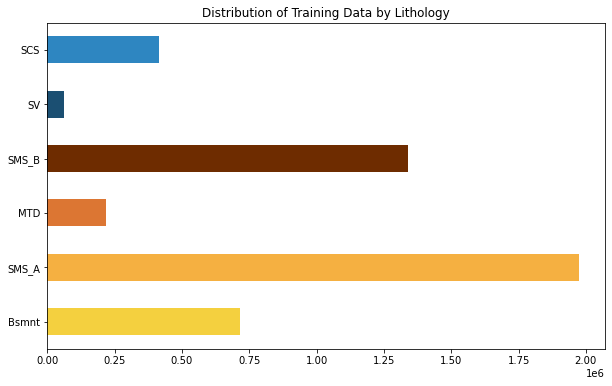

In [10]:
#The following are the geologic descriptions of each labels:
#1. Basement/Other: Basement - Low S/N; Few internal Reflections; May contain volcanics in places
#2. Slope Mudstone A: Slope to Basin Floor Mudstones; High Amplitude Upper and Lower Boundaries; Low Amplitude Continuous/Semi-Continuous Internal Reflectors
#3. Mass Transport Deposit: Mix of Chaotic Facies and Low Amplitude Parallel Reflections
#4. Slope Mudstone B: Slope to Basin Floor Mudstones and Sandstones; High Amplitude Parallel Reflectors; Low Continuity Scour Surfaces
#5. Slope Valley: High Amplitude Incised Channels/Valleys; Relatively low relief
#6. Submarine Canyon System: Erosional Base is U shaped with high local relief. Internal fill is low amplitude mix of parallel inclined surfaces and chaotic disrupted reflectors. Mostly deformed slope mudstone filled with isolated sinuous sand-filled channels near the basal surface.
facies_labels = ['Bsmnt', 'SMS_A', 'MTD', 'SMS_B', 'SV', 'SCS']

facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

#count the number of unique entries for each lithology
facies_counts = out_df['facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

fig = facies_counts.plot.barh(color=facies_colors, 
                   title='Distribution of Training Data by Lithology', figsize=(10,6)).get_figure()
facies_counts
#fig.savefig('distribution_of_facies_horizontal.png',dpi=600)

In [11]:
len(out_df)

4720152

In [12]:
correct_facies_labels = pd.DataFrame(out_df['facies'])

***

In [13]:
#correct_facies_labels = out_df['facies'].values
correct_facies_labels

feature_vectors = out_df.drop(['Unnamed: 0','seis_cos_phase','facies'], axis=1)

In [14]:
print(len(correct_facies_labels))
print(feature_vectors.head())

4720152
   seis_amplitude  seis_ampl_norm  seis_envelope  seis_hilbert  \
0      356.912350        0.887200     383.579494   -140.523302   
1     -140.958660       -0.333806     219.666440    168.475515   
2     -145.538830       -0.443451     151.920639     43.569805   
3      -51.809357       -0.166000     201.376782   -194.598045   
4     -438.472400       -1.256129     443.977235    -69.697366   

   seis_maxpeakamp     seis_rms  seis_Xpos  seis_Ypos  seis_Zpos  glcm_asm  \
0       356.912354   837.427185        1.0        1.0        1.0     625.0   
1       353.690186    34.859436        1.0      101.0        1.0     625.0   
2       411.876953   958.580994        1.0      201.0        1.0     225.0   
3       448.863525  1965.628540        1.0      301.0        1.0     425.0   
4       275.729004   107.951904        1.0      401.0        1.0     325.0   

   ...  glcm_stdev  glcm_dissimilarity  glcm_homogeneity  glcm_totalenergy  \
0  ...   99.215675                 0.0          

In [15]:
#feature_vectors['seis_amplitude'].iloc[4]
type(correct_facies_labels)

pandas.core.frame.DataFrame

In [16]:
# out_df is the dataframe of our "feature_vectors"

In [ ]:
# Standardizing the data to get them to zero mean and unit variance
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [ ]:
# Check using cross val score:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000)
#example: scores = cross_val_score(clf, X, y, cv=5)
#scores = cross_val_score(clf, feature_vectors, correct_facies_labels, cv=5)

In [ ]:
#scores

In [17]:
feature_vectors.columns

Index(['seis_amplitude', 'seis_ampl_norm', 'seis_envelope', 'seis_hilbert',
       'seis_maxpeakamp', 'seis_rms', 'seis_Xpos', 'seis_Ypos', 'seis_Zpos',
       'glcm_asm', 'glcm_contrast', 'glcm_entropy', 'glcm_maxamp', 'glcm_mean',
       'glcm_stdev', 'glcm_dissimilarity', 'glcm_homogeneity',
       'glcm_totalenergy', '02_04hz', '04_08hz', '08_16hz', '16_32hz',
       '32_64hz', '64_128hz'],
      dtype='object')

In [18]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['seis_amplitude', 'seis_ampl_norm', 'seis_envelope', 'seis_hilbert', 'seis_maxpeakamp', 'seis_rms', 'seis_Xpos', 'seis_Ypos', 'seis_Zpos',
             'glcm_asm', 'glcm_contrast', 'glcm_entropy', 'glcm_maxamp', 'glcm_mean', 'glcm_stdev', 'glcm_dissimilarity', 'glcm_homogeneity', 'glcm_totalenergy', 
             '02_04hz', '04_08hz', '08_16hz', '16_32hz', '32_64hz', '64_128hz']

scaled_features = pd.DataFrame(data = feature_vectors)
scaled_features[numerical] = scaler.fit_transform(feature_vectors[numerical])

# Show an example of a record with scaling applied
display(scaled_features.head(n = 5))

,seis_amplitude,seis_ampl_norm,seis_envelope,seis_hilbert,seis_maxpeakamp,seis_rms,seis_Xpos,seis_Ypos,seis_Zpos,glcm_asm,...,glcm_stdev,glcm_dissimilarity,glcm_homogeneity,glcm_totalenergy,02_04hz,04_08hz,08_16hz,16_32hz,32_64hz,64_128hz
0,0.517357,0.551568,0.078544,0.440325,0.243475,0.061754,0.0,0.0,0.0,1.000000,...,0.819432,0.000000,1.000000,1.000000,0.523923,0.487028,0.527645,0.488894,0.476184,0.449272
1,0.462673,0.495622,0.044970,0.474967,0.242920,0.002571,0.0,0.2,0.0,1.000000,...,0.594000,0.000000,1.000000,1.000000,0.509893,0.483633,0.504030,0.476744,0.489571,0.529740
2,0.462170,0.490598,0.031094,0.460964,0.252938,0.070688,0.0,0.4,0.0,0.324324,...,0.351308,0.157895,0.797297,0.480666,0.597943,0.467652,0.515693,0.496954,0.472992,0.468036
3,0.472465,0.503311,0.041224,0.434263,0.259305,0.144950,0.0,0.6,0.0,0.662162,...,0.649544,0.000000,1.000000,0.772300,0.647343,0.591006,0.531339,0.509728,0.479900,0.506638
4,0.429996,0.453361,0.090916,0.448266,0.229498,0.007961,0.0,0.8,0.0,0.493243,...,0.456321,0.000000,1.000000,0.637908,0.481393,0.483540,0.504458,0.501227,0.513088,0.527630


In [19]:
# Randomly divide data into training and test sets, while preserving the imbalance class ratios (stratified)
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(
#        scaled_features, correct_facies_labels, test_size=0.2, random_state=42, stratify=correct_facies_labels)


# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, 
                                                    correct_facies_labels, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3776121 samples.
Testing set has 944031 samples.


#### Oversampling

In [65]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

In [66]:
X_smote, y_smote = SMOTE(random_state=42).fit_sample(X_train, y_train)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# lbfgs is default, but setting it makes it clear to readers of the code
# will iterate over solvers and choose one of the following: https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=100)

# Create an instance of Logistic Regression Classifier and fit the data.
#logreg.fit(X_train, np.array(y_train).ravel())
#logreg.score(X_train,y_train)
logreg.fit(X_smote, np.array(y_smote).ravel())
logreg.score(X_smote,y_smote)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6909850192343183

In [74]:
predicted_labels = logreg.predict(X_test)
logreg.score(X_test,y_test)

0.5539680370665794

In [75]:
from sklearn.metrics import confusion_matrix
from classification_utilities import display_cm

In [76]:
conf = confusion_matrix(y_test, predicted_labels)
display_cm(conf, facies_labels,display_metrics=True,hide_zeros=True)

     Pred Bsmnt SMS_A   MTD SMS_B    SV   SCS Total
     True
    Bsmnt 135555  2344  5848                   143747
    SMS_A 30794 148644 76565 54843 41582 41851 394279
      MTD   362  4818 38054         610       43844
    SMS_B       47444  5418 136968 33456 44226 267512
       SV        2068              9562   575 12205
      SCS        1166    51 23342  3705 54180 82444

Precision  0.81  0.72  0.30  0.64  0.11  0.38  0.65
   Recall  0.94  0.38  0.87  0.51  0.78  0.66  0.55
       F1  0.87  0.49  0.45  0.57  0.19  0.49  0.57


In [ ]:
#logreg.fit(X_smote, np.array(y_smote).ravel())
#y_pred = logreg.predict(X_test)
#
#conf = confusion_matrix(y_test, y_pred)
#display_cm(conf, facies_labels,display_metrics=True,hide_zeros=True)

#### Build Random Forest Model

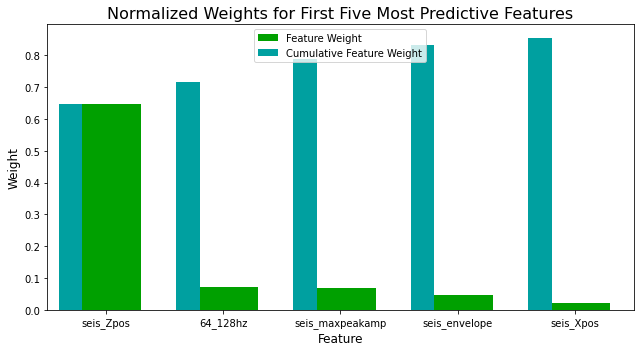

In [53]:
# LOOK at feature importances first
# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier
import visuals as vs

# Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42).fit(X_train, np.array(y_train).ravel())

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)
#=======================================================================================
#pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar')



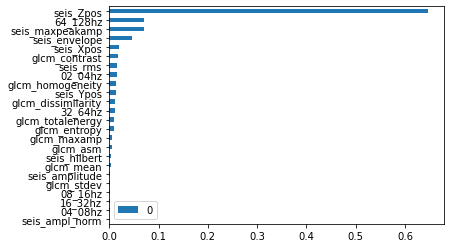

In [54]:
new_importances = list(zip(model.feature_importances_, X_train.columns))
new_importances.sort()

pd.DataFrame(new_importances, index=[x for (_,x) in new_importances]).plot(kind = 'barh', sort_columns=True)

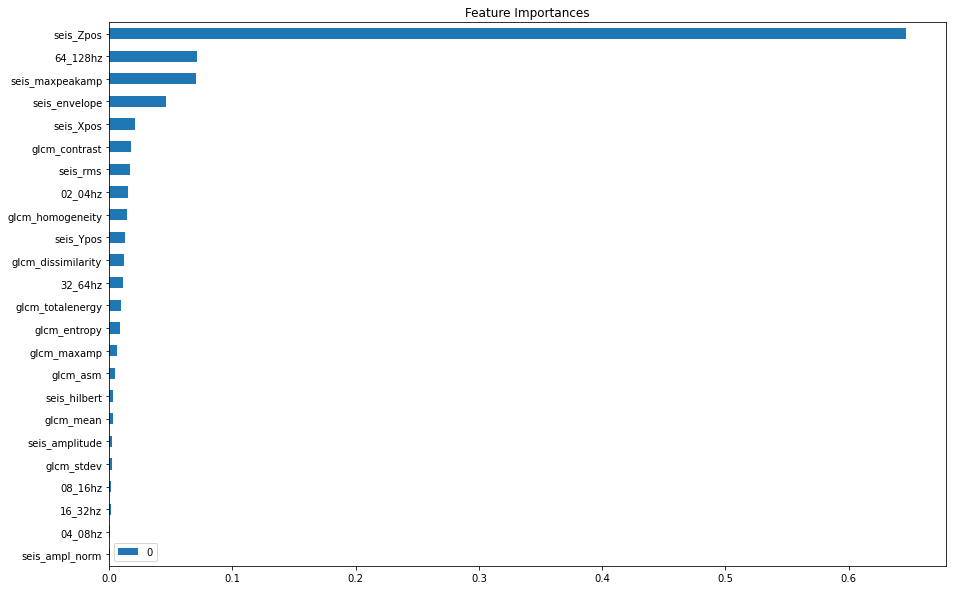

In [55]:
fig = pd.DataFrame(new_importances, index=[x for (_,x) in new_importances]).plot(kind = 'barh', 
                   title='Feature Importances', figsize=(15,10)).get_figure()

fig.savefig('nEstim50_maxdepth05_Feature_importances.png',dpi=600)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

rf = RandomForestClassifier(max_depth=5, n_estimators=4, random_state=42)

perm_imp_rfpimp = permutation_importances(rf, X_train, np.array(y_train).ravel(), r2)

#import eli5
#from eli5.sklearn import PermutationImportance
#
#rf = RandomForestClassifier(max_depth=5, n_estimators=4, random_state=42)
#
#perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(X_train, np.array(y_train).ravel())
#perm_imp_eli5 = imp_df(X_train.columns, perm.feature_importances_)

C:\ProgramData\Anaconda3\lib\site-packages\rfpimp.py:402: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_sample, y_sample)


In [1]:
import os

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold

# Build Random Forest model
clf = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=42,
    verbose=0,
    warm_start=False,
    class_weight='balanced'
)

***

In [81]:
# CREATE AN ADDITIONAL 60-40 (INSTEAD OF 80/20) TEST/TRAIN SPLIT, ALSO WITH SMOTE:
# Split the 'features' and 'income' data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_features, 
                                                    correct_facies_labels, 
                                                    test_size = 0.4, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train1.shape[0]))
print("Testing set has {} samples.".format(X_test1.shape[0]))

Training set has 2832091 samples.
Testing set has 1888061 samples.


In [82]:
X_smote1, y_smote1 = SMOTE(random_state=42).fit_sample(X_train1, y_train1)

***

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from classification_utilities import display_cm

# defining and instantiating other models
# generalizing for more than one model run at a time:
##X_train, X_test, y_train, y_test = train_test_split(
##        scaled_features, correct_facies_labels, test_size=0.2, random_state=42,stratify=correct_facies_labels)

# dict of models and their function calls
dict_classifiers = {#'Logistic Reg': LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000),
                    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=7, criterion='gini', min_samples_leaf=3)#,
                    #'Random Forest': RandomForestClassifier()#,
                    #'Gradient Boosting': GradientBoostingClassifier(random_state=42),
                   }

for model, model_instantiation in dict_classifiers.items():
    # Fit each model in dictionary:
    #y_pred = model_instantiation.fit(X_train, y_train).predict(X_test)
    #y_pred = model_instantiation.fit(X_smote, y_smote).predict(X_test)
    y_pred = model_instantiation.fit(X_smote1, y_smote1).predict(X_test1)

    #conf = confusion_matrix(y_test, y_pred)
    conf = confusion_matrix(y_test1, y_pred)
    display(model)
    display_cm(conf, facies_labels,display_metrics=True,hide_zeros=True)
    print('\n')

'Decision Tree'

     Pred Bsmnt SMS_A   MTD SMS_B    SV   SCS Total
     True
    Bsmnt 269991 12766  3679    46             286482
    SMS_A 40699 400857 120029 28084 65583 133723 788975
      MTD   105  1858 84000   968             86931
    SMS_B       25548 11925 449567 31994 16786 535820
       SV        1385          70 23030       24485
      SCS        6373    93   911   106 157885 165368

Precision  0.87  0.89  0.38  0.94  0.19  0.51  0.84
   Recall  0.94  0.51  0.97  0.84  0.94  0.95  0.73
       F1  0.90  0.65  0.55  0.89  0.32  0.67  0.75




In [177]:
# Placed confusion matrix outputs into numpy arrays

#KEEP
##k1 = np.array([126813, 16934,  0, 0,      0, 0, 
##               20099,  282274, 0, 59829,  0, 32077, 
##               622,    36102,  0, 7120,   0, 0, 
##               0,      45808,  0, 221445, 0, 259,  
##               0,      5094,   0, 5541,   0, 1570,
##               0,      22916,  0, 8146,   0, 51382])

k1 = np.array([285584, 860,    38,    0,      0,     0, 
               4255,   734786, 15396, 5364,   13472, 15702, 
               10,     733,    86188, 0,      0,     0, 
               0,      4175,   26,    530954, 495,   170,  
               0,      184,    0,     9,      24292, 0,
               0,      1621,   5,     82,     0,     163660])

k1_2d = np.reshape(k1,(6,6))

In [178]:
#normalize the data, per column, before plotting. because each mis-prediction is only related to it's own column.

from sklearn import preprocessing

df_k1_2d = pd.DataFrame(k1_2d)

x = df_k1_2d.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_k1_2d = pd.DataFrame(x_scaled)

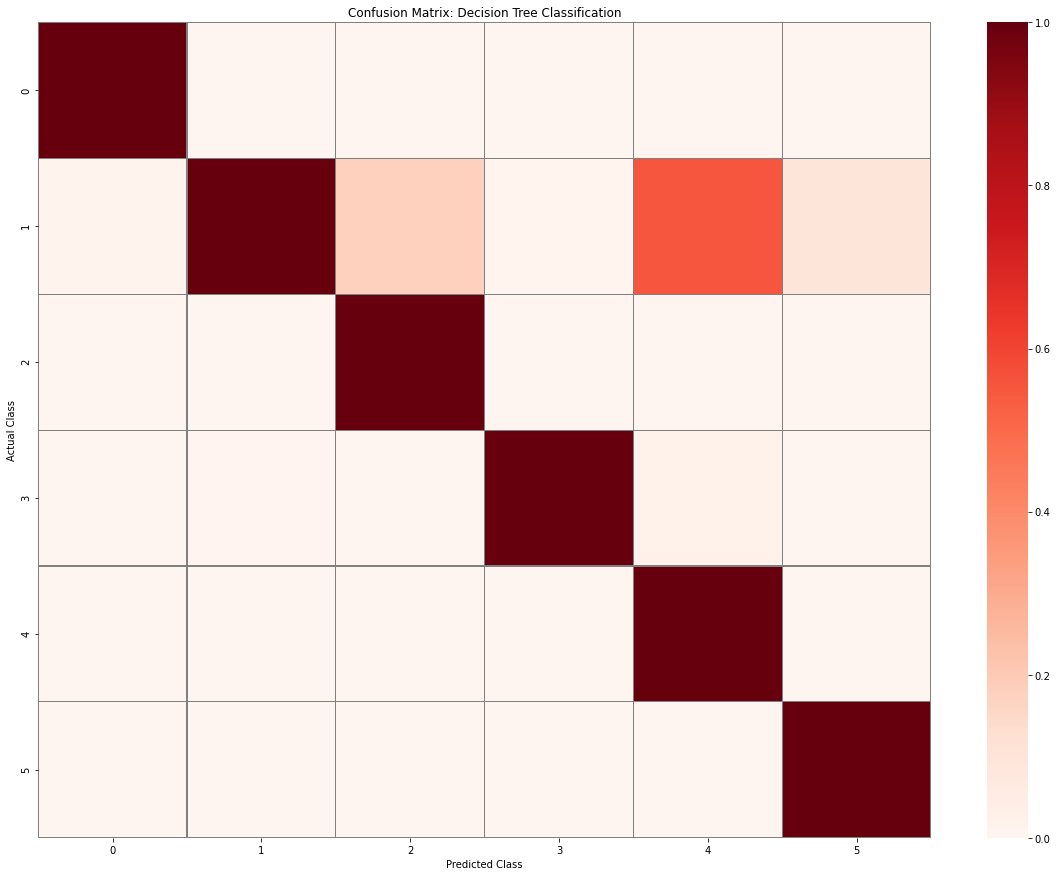

In [183]:
import seaborn as sns

# Plot heatmap: KNN
sns.heatmap(df_k1_2d,cmap='Reds',linewidth=0.1,linecolor='grey')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix: Decision Tree Classification')
plt.show()
#plt.savefig('DTree_heatmap_CURRENT2.png')

In [ ]:
#EXAMPLE: random forest

### Prediction on blind well using KNN (re-train first, just in case it got messed up earlier):
##rf = RandomForestClassifier()
##rf.fit(X_train, np.array(y_train).ravel())
##
##y_pred = rf.predict(X_blind)
##blind['Prediction'] = y_pred
##
##cv_conf = confusion_matrix(y_blind, y_pred)
##display_cm(cv_conf, facies_labels_2,
##           display_metrics=True, hide_zeros=True)

In [ ]:
# ref: https://www.kaggle.com/ynouri/random-forest-k-fold-cross-validation

# X = feature_vectors, y = correct_facies_labels

# using KFold cross-validation:
#skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
#
#for train, validation in skf.split(feature_vectors, correct_facies_labels):
#    print('train:',train)
#    print('validation',validation)
##    print(feature_vectors[train].shape, feature_vectors[validation].shape)

In [ ]:
#feature_vectors.shape

### Applying the predictions to new data:
Now that we have a trained facies classification model we can use it to identify facies on other seismic lines (slices).  In this case, we will apply the classifier to two slices, but we could use it on any number of images from the seismic data. This dataset is similar to the training data except it does not have facies labels.  It is loaded into a dataframe called `holdout_data`.

In [84]:
holdout_data = pd.read_csv('holdout_test.csv')

In [85]:
holdout_data.columns

Index(['Unnamed: 0', 'seis_amplitude', 'seis_ampl_norm', 'seis_cos_phase',
       'seis_envelope', 'seis_hilbert', 'seis_maxpeakamp', 'seis_rms',
       'seis_Xpos', 'seis_Ypos', 'seis_Zpos', 'glcm_asm', 'glcm_contrast',
       'glcm_entropy', 'glcm_maxamp', 'glcm_mean', 'glcm_stdev',
       'glcm_dissimilarity', 'glcm_homogeneity', 'glcm_totalenergy', '02_04hz',
       '04_08hz', '08_16hz', '16_32hz', '32_64hz', '64_128hz'],
      dtype='object')

In [86]:
holdout_data.describe()

,Unnamed: 0,seis_amplitude,seis_ampl_norm,seis_cos_phase,seis_envelope,seis_hilbert,seis_maxpeakamp,seis_rms,seis_Xpos,seis_Ypos,...,glcm_stdev,glcm_dissimilarity,glcm_homogeneity,glcm_totalenergy,02_04hz,04_08hz,08_16hz,16_32hz,32_64hz,64_128hz
count,786692.000000,786692.000000,7.866920e+05,786692.0,786692.000000,7.866920e+05,786692.000000,786692.000000,786692.000000,786692.0,...,786692.000000,786692.000000,786692.000000,786692.000000,786692.000000,786692.000000,786692.000000,786692.000000,786692.000000,786692.000000
mean,393345.500000,0.787710,-4.290126e-11,0.0,462.558383,-9.862437e-15,438.636846,700.501799,391.500000,52.0,...,63.620114,1.987909,24.006084,17.869612,0.330845,-0.020573,0.286913,0.769033,-0.157688,0.000760
std,227098.563323,411.794179,1.000001e+00,0.0,353.819964,4.117937e+02,346.547153,651.297578,225.743914,0.0,...,13.875654,1.733261,0.866303,3.038365,33.523177,91.747231,339.104470,788.934776,573.908975,52.390261
min,0.000000,-3350.764200,-8.363732e+00,0.0,0.408534,-3.192493e+03,-418.572998,0.000000,1.000000,52.0,...,9.590849,0.000000,14.799999,6.557438,-227.289841,-800.259521,-2669.927734,-5803.552246,-5207.896484,-542.012268
25%,196672.750000,-208.507310,-5.137358e-01,0.0,213.822309,-2.099539e+02,197.428101,236.748352,196.000000,52.0,...,55.049408,1.000000,23.500000,16.278820,-17.822265,-54.593405,-198.827065,-416.580070,-278.955292,-19.401659
50%,393345.500000,0.376406,-9.758926e-04,0.0,373.148837,-1.551343e-01,357.692383,527.881744,391.500000,52.0,...,60.328140,2.000000,24.000000,17.635193,0.208236,-0.630193,-1.926212,1.358198,0.181928,0.011198
75%,590018.250000,212.569153,5.208535e-01,0.0,611.730721,2.110909e+02,588.069824,971.447479,587.000000,52.0,...,69.813591,3.000000,24.500000,19.519220,17.963491,53.400414,199.055984,421.393196,277.972198,19.410234
max,786691.000000,3213.292700,6.991366e+00,0.0,3534.385769,3.444877e+03,3213.292725,8051.932617,782.000000,52.0,...,109.327965,22.000000,25.000000,25.000000,232.253174,924.909668,2290.727539,6542.048340,5298.026855,515.869629


In [87]:
holdout_features = holdout_data.drop(['Unnamed: 0','seis_cos_phase'], axis=1)

In [92]:
holdout_features.columns

Index(['seis_amplitude', 'seis_ampl_norm', 'seis_envelope', 'seis_hilbert',
       'seis_maxpeakamp', 'seis_rms', 'seis_Xpos', 'seis_Ypos', 'seis_Zpos',
       'glcm_asm', 'glcm_contrast', 'glcm_entropy', 'glcm_maxamp', 'glcm_mean',
       'glcm_stdev', 'glcm_dissimilarity', 'glcm_homogeneity',
       'glcm_totalenergy', '02_04hz', '04_08hz', '08_16hz', '16_32hz',
       '32_64hz', '64_128hz'],
      dtype='object')

In [89]:
X_unknown = scaler.transform(holdout_features)

In [185]:
#y_unknown = logreg.predict(X_unknown)
y_unknown = model_instantiation.predict(X_unknown)

In [186]:
#set predicted lithology classes as a column in the holdout data:
holdout_data['facies'] = y_unknown
holdout_data.head(10)

,Unnamed: 0,seis_amplitude,seis_ampl_norm,seis_cos_phase,seis_envelope,seis_hilbert,seis_maxpeakamp,seis_rms,seis_Xpos,seis_Ypos,...,glcm_dissimilarity,glcm_homogeneity,glcm_totalenergy,02_04hz,04_08hz,08_16hz,16_32hz,32_64hz,64_128hz,facies
0,0,178.253070,0.402518,0.0,186.453777,54.688707,178.253067,609.075989,1.0,52.0,...,8.0,21.0,16.155495,-61.035660,-32.889404,-242.246155,-265.709717,126.984169,-30.023045,4
1,1,83.507490,0.186329,0.0,151.200996,126.048561,83.507492,445.815308,2.0,52.0,...,8.0,21.0,16.401220,-47.806114,-8.256169,-254.758606,13.038586,86.742287,-58.781429,4
2,2,56.352690,0.126369,0.0,184.839905,176.040235,75.860397,350.097473,3.0,52.0,...,8.0,21.0,16.155495,-41.563202,7.563332,-258.337189,131.146042,45.120785,-67.176292,4
3,3,31.581726,0.071109,0.0,198.939451,196.416649,124.264908,289.002594,4.0,52.0,...,11.0,19.5,14.594520,-23.878252,8.091144,-257.959290,148.376633,-10.752165,-73.585869,4
4,4,28.444320,0.063198,0.0,147.614053,144.847607,123.937286,259.507568,5.0,52.0,...,9.0,20.5,13.527749,-12.148462,18.826374,-288.255341,150.084122,4.307118,-75.647537,4
5,5,-7.164182,-0.018493,0.0,108.767569,108.531371,132.378983,331.344910,6.0,52.0,...,7.0,21.5,14.456832,-20.251026,5.060979,-328.981262,151.686646,-6.128195,-73.090576,4
6,6,-72.483170,-0.166164,0.0,111.506387,84.734080,172.945908,340.573242,7.0,52.0,...,5.0,22.5,17.972200,-23.591356,-16.342110,-335.690491,162.390152,-56.818802,-68.986694,4
7,7,-62.426773,-0.143755,0.0,68.397280,27.947914,157.431671,246.121719,8.0,52.0,...,3.0,23.5,22.203604,-20.309168,-13.843538,-361.003357,142.413345,-93.696342,-52.439308,4
8,8,-89.596910,-0.205077,0.0,90.711210,14.174543,191.299438,207.023666,9.0,52.0,...,0.0,25.0,25.000000,-24.238804,-2.899833,-370.181122,118.321777,-98.687531,-55.987682,4
9,9,-163.401690,-0.371396,0.0,168.638903,41.700939,250.094696,167.026382,10.0,52.0,...,0.0,25.0,25.000000,-20.574701,6.225697,-385.570312,100.849068,-125.664017,-62.075932,4


In [93]:
#holdout_data.to_csv('holdout_data_with_predicted_facies_test.csv')

In [187]:
len(holdout_data)

786692

In [188]:
temp = holdout_data.sort_values(['seis_Xpos', 'seis_Zpos'], ascending = (True, True))
temp = temp.reset_index(drop=True)
temp.head()

,Unnamed: 0,seis_amplitude,seis_ampl_norm,seis_cos_phase,seis_envelope,seis_hilbert,seis_maxpeakamp,seis_rms,seis_Xpos,seis_Ypos,...,glcm_dissimilarity,glcm_homogeneity,glcm_totalenergy,02_04hz,04_08hz,08_16hz,16_32hz,32_64hz,64_128hz,facies
0,0,178.253070,0.402518,0.0,186.453777,54.688707,178.253067,609.075989,1.0,52.0,...,8.0,21.0,16.155495,-61.035660,-32.889404,-242.246155,-265.709717,126.984169,-30.023045,4
1,782,45.689194,0.102928,0.0,204.097304,198.917589,45.689194,854.279602,1.0,52.0,...,7.0,21.5,17.748240,-59.091675,-34.312092,-142.819366,-495.673523,291.048065,-61.266506,4
2,1564,-103.892700,-0.235122,0.0,199.156124,169.910178,263.831299,636.137451,1.0,52.0,...,6.0,22.0,18.574175,-57.485035,-35.662453,-2.860893,-445.533966,160.838455,25.426388,4
3,2346,-191.005450,-0.431994,0.0,206.038138,77.256924,469.535400,62.709412,1.0,52.0,...,6.0,22.0,15.000000,-56.127361,-36.345650,162.056763,-185.341736,-352.064728,93.645210,4
4,3128,-182.519680,-0.412816,0.0,185.322524,-32.109257,469.535400,378.759430,1.0,52.0,...,4.0,23.0,15.394804,-54.478439,-35.377197,325.664368,70.513817,-686.366699,0.593864,4


In [189]:
facies_array = temp.as_matrix(columns=['facies'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [190]:
facies_array.shape

(786692, 1)

In [191]:
#facies_2dslice = np.reshape(facies_array,(-1,782))
facies_2dslice = np.zeros([nz,nx])
elem = 0
for ix in range(nx):
    for iz in range(nz):
        facies_2dslice[iz,ix] = facies_array[elem]
        elem += 1

In [171]:
#holdout_img = np.load(TRAIN_DATASET_PATH)['data'][:,:,y0]
holdout_labels = np.load(TRAIN_LABELS_PATH)['labels'][:,:,51]

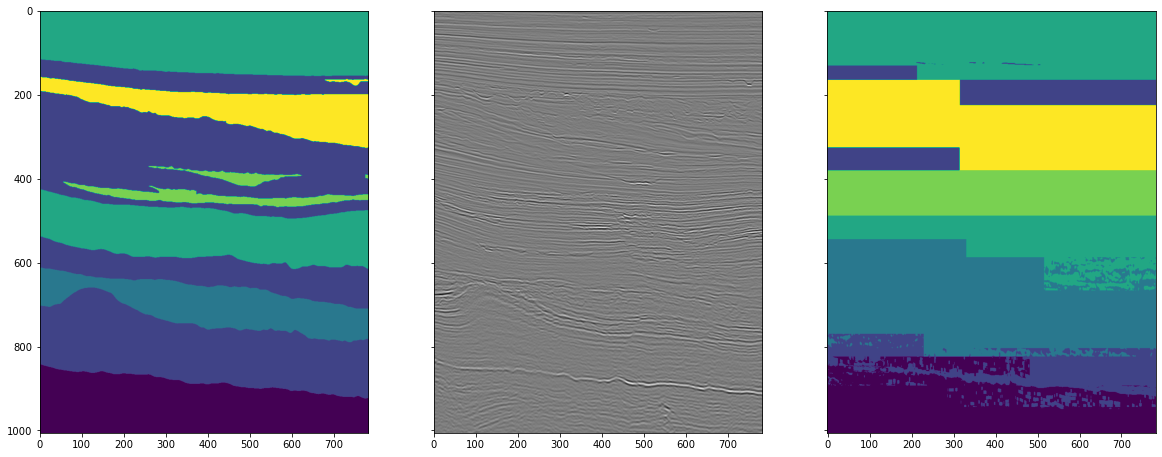

In [192]:
# Test cell: view seismic slice
fig, ax = plt.subplots(1,3, sharey=True);
fig.set_size_inches(20, 8);
#ax[0].imshow(train_dataset[:,:,51])
ax[0].imshow(holdout_labels)
ax[1].imshow(train_dataset[:,:,51], cmap='binary')
ax[2].imshow(facies_2dslice)

fig.savefig('comparison_dtree3.png', dpi=600)

In [146]:
# test cell
#for i in range(1000,1010):
#    display(temp.loc[[i]])